In [25]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [26]:
img = cv2.imread('lenna.png',0)
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

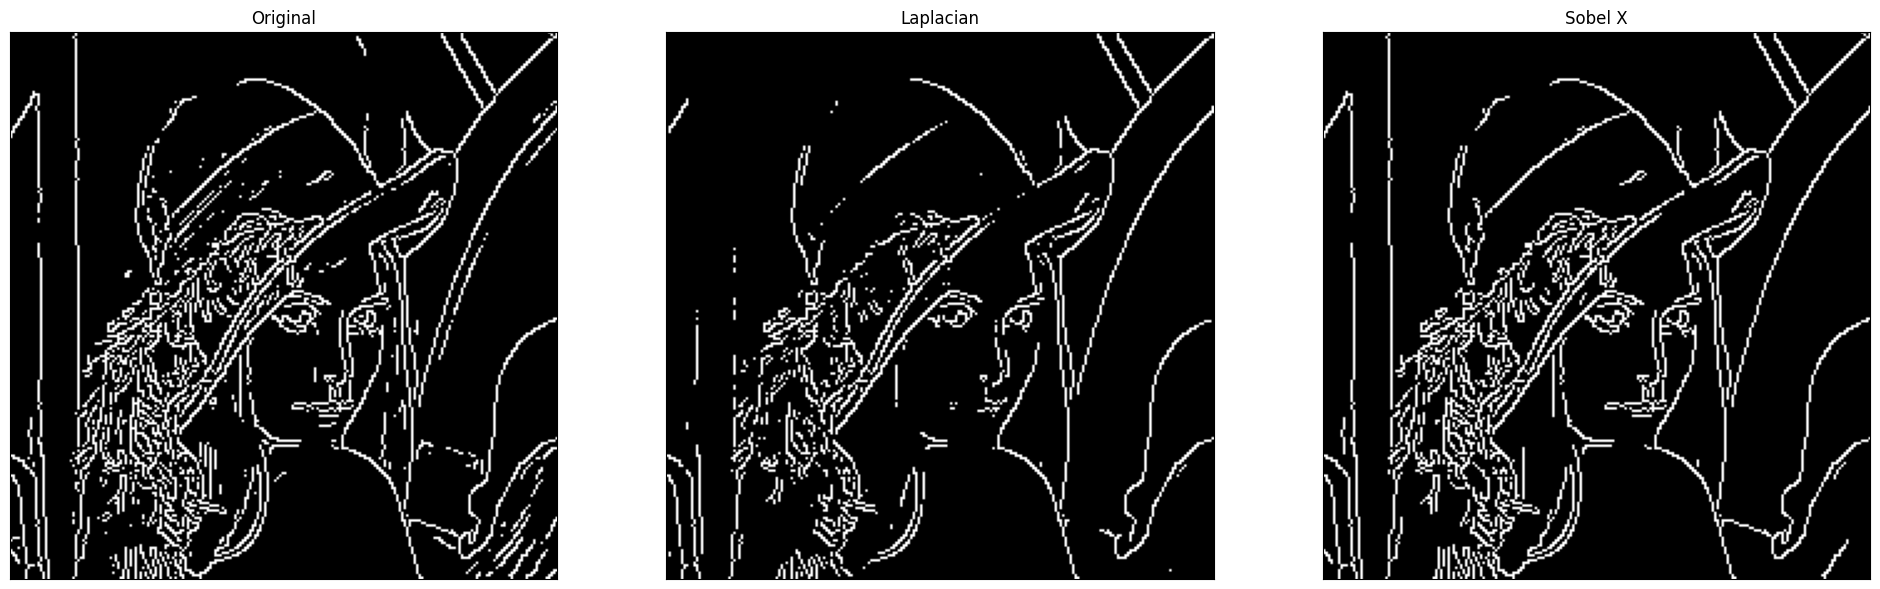

In [27]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(edges100,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges200,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()


In [28]:
im = cv2.imread('woman-hand-palm-25848097.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,230,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

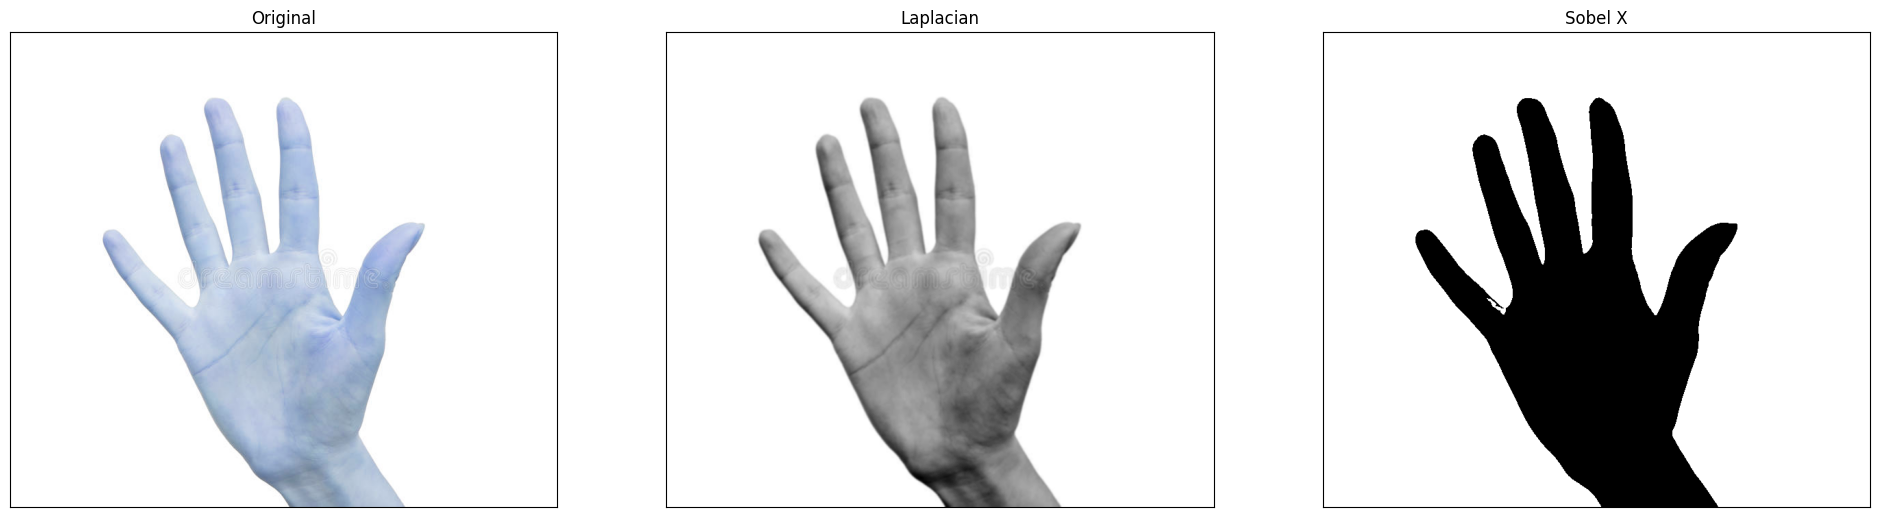

In [29]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel7 = np.ones((7,7),np.uint8)
erosion = cv2.erode(thresh, kernel5, iterations = 1)
#dilation = cv2.dilate(thresh, kernel5, iterations = 1)
#closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel5)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel5)


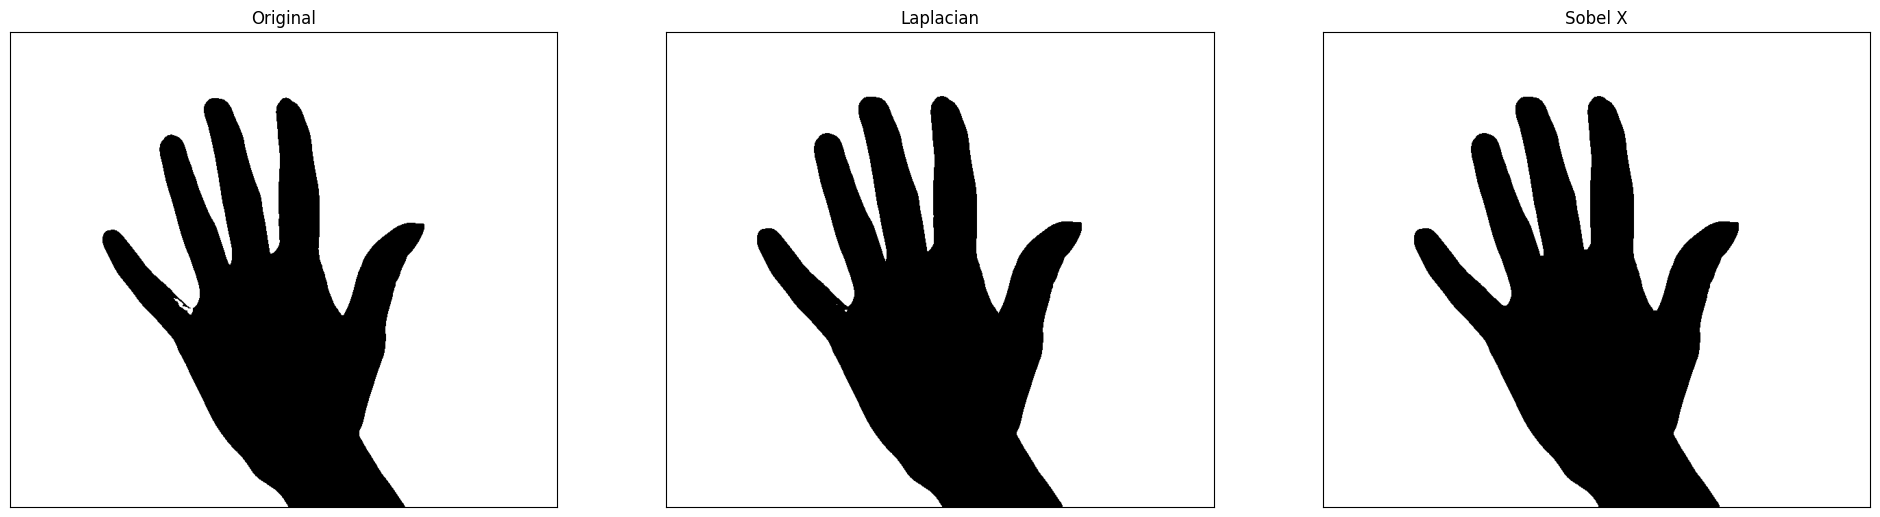

In [31]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(erosion,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [32]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\drawing.cpp:2526: error: (-215:Assertion failed) 0 <= contourIdx && contourIdx < (int)last in function 'cv::drawContours'


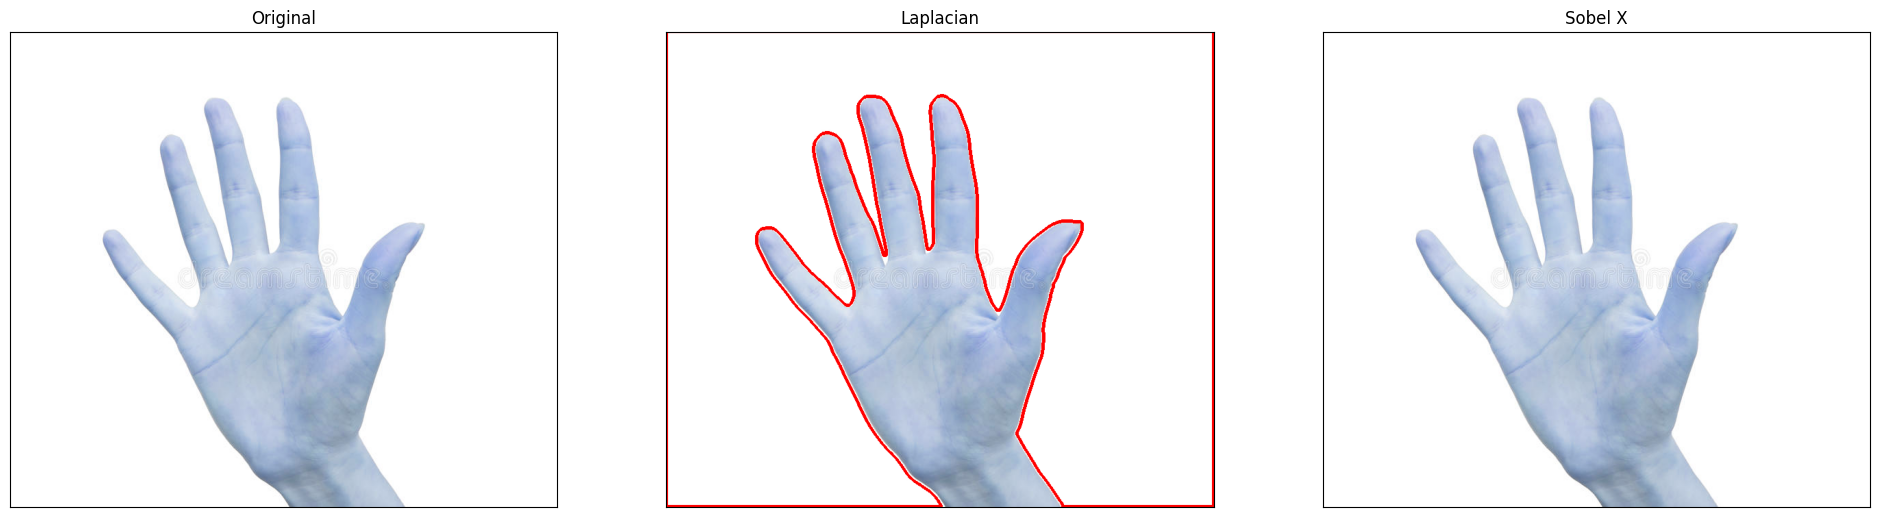

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

IndexError: tuple index out of range

In [ ]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

NameError: name 'M' is not defined

In [ ]:
print(cx, cy)

NameError: name 'cx' is not defined

In [ ]:
area = cv2.contourArea(cnt)

NameError: name 'cnt' is not defined

In [ ]:
print(area)

NameError: name 'area' is not defined

In [ ]:
perimeter = cv2.arcLength(cnt,True)

NameError: name 'cnt' is not defined

In [ ]:
print(perimeter)

NameError: name 'perimeter' is not defined

In [ ]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

NameError: name 'cnt' is not defined

In [ ]:
print(epsilon)

NameError: name 'epsilon' is not defined

In [ ]:
print(approx)

[[[366  10]]

 [[380  89]]

 [[394  20]]

 [[410  18]]

 [[438 140]]

 [[422 167]]

 [[482 244]]

 [[437 448]]

 [[377 494]]

 [[318 452]]

 [[285 277]]

 [[291 223]]

 [[339 137]]

 [[335  62]]]


In [ ]:
img1 = cv2.circle(img1,(cx,cy),5,(0,0,255),-1)

In [ ]:
img2 = im.copy()
img2 = cv2.drawContours(img2, approx, -1, (0,0,255), 3)

NameError: name 'img2' is not defined

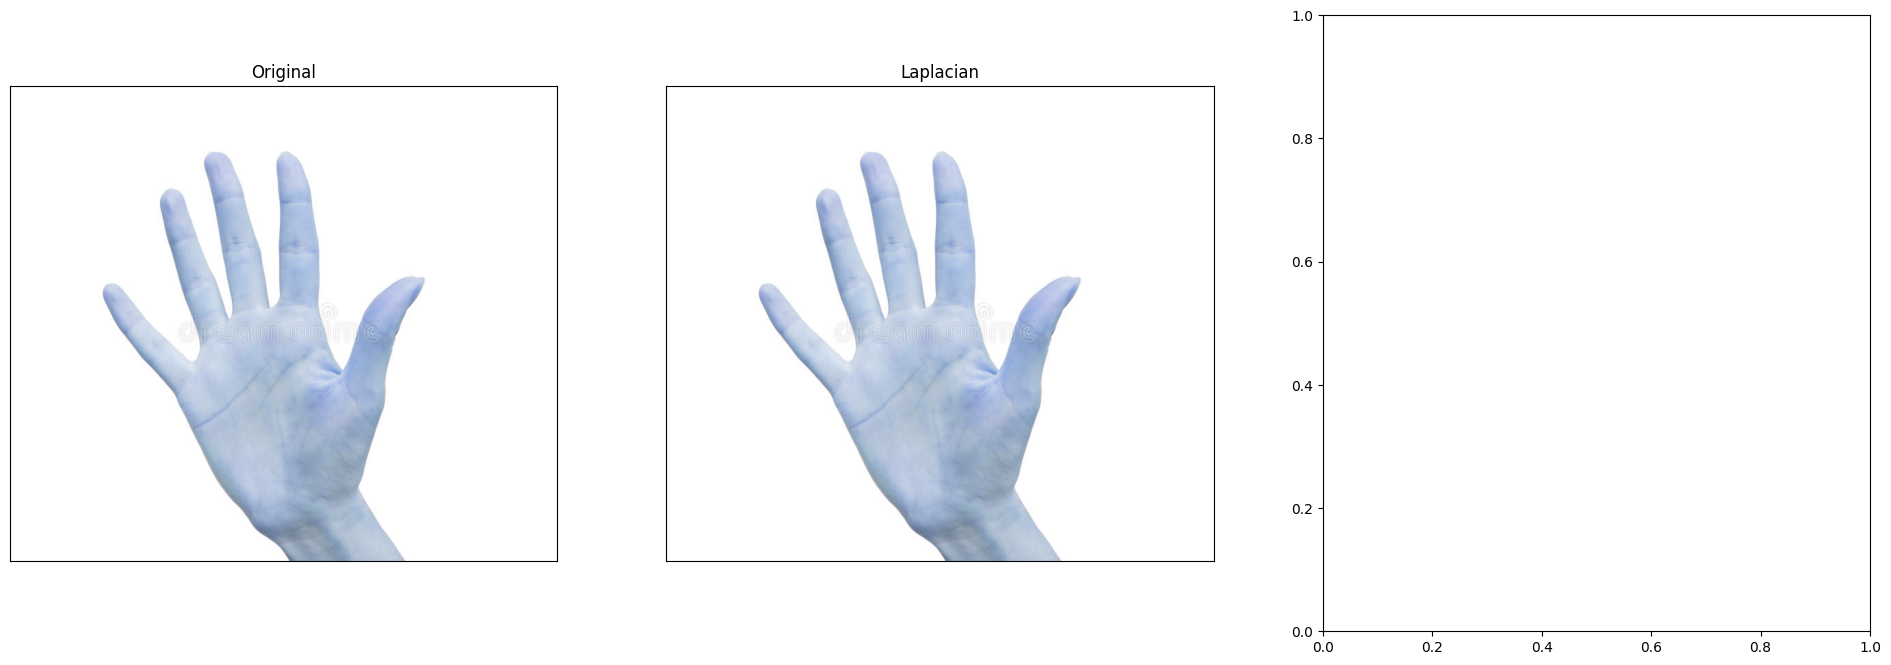

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
x,y,w,h = cv2.boundingRect(cnt)
img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

NameError: name 'img2' is not defined

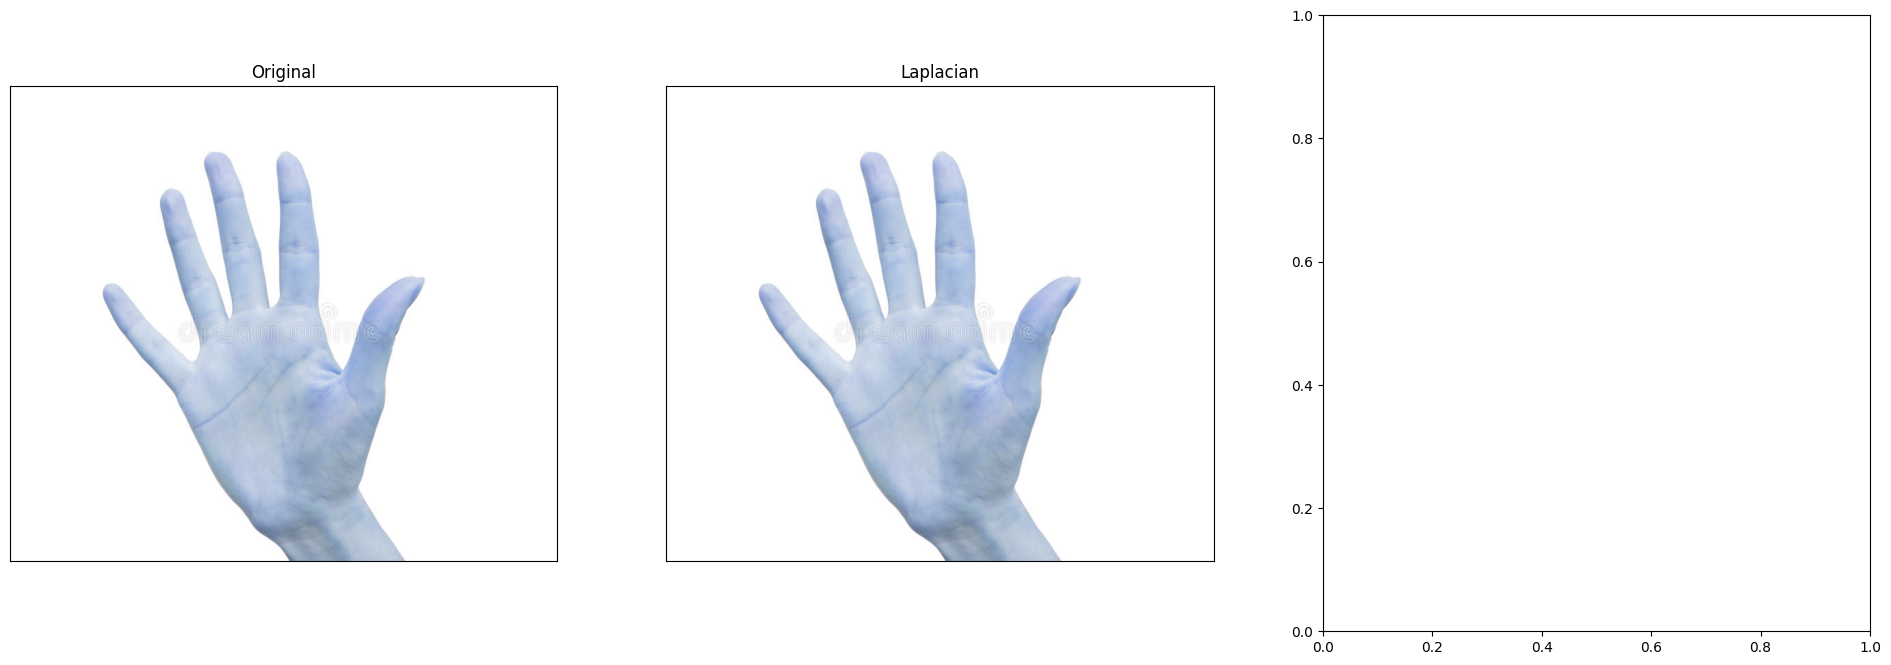

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img1 = cv2.drawContours(img1,[box],0,(0,0,255),2)

C:\Users\303\AppData\Local\Temp\ipykernel_1880\1864750122.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


NameError: name 'img2' is not defined

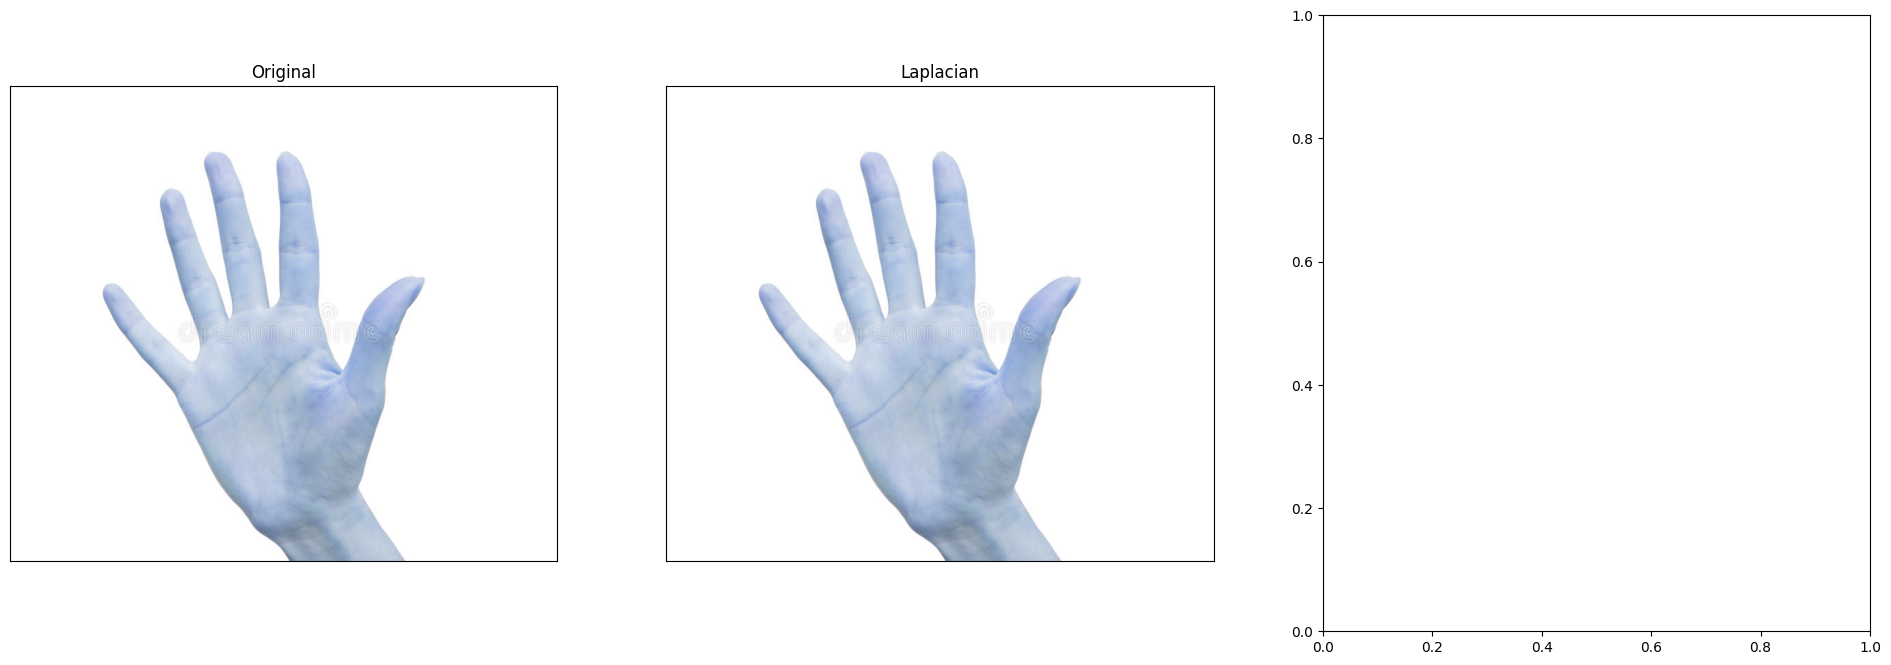

In [33]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img1 = cv2.circle(img1,center,radius,(0,255,0),2)

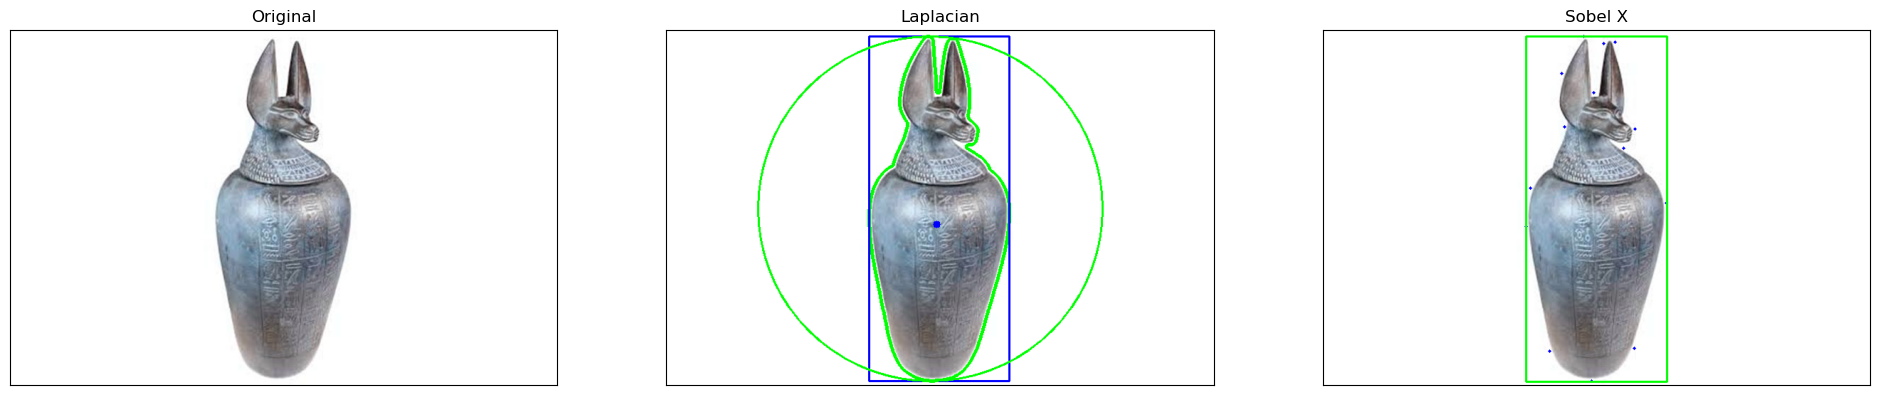

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
ellipse = cv2.fitEllipse(cnt)
img1 = cv2.ellipse(img1,ellipse,(0,255,0),2)

In [ ]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img1 = cv2.line(img1,(cols-1,righty),(0,lefty),(0,255,0),2)

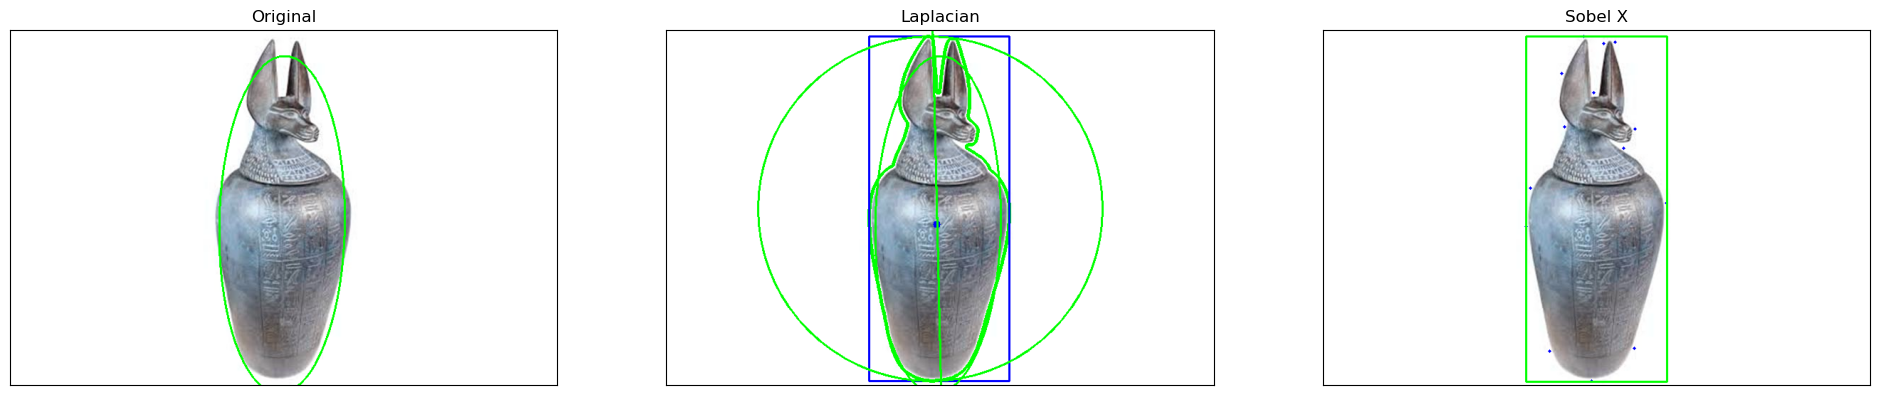

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()